## Análisis de retención de personal

In [ ]:
# Importar la librería pandas
import pandas as pd

# Leer el conjunto de datos por medio de ruta de Drive y asignarlo a la variable "df"
dataset = "/content/drive/MyDrive/Datasets/employee_churn_data.csv"
df = pd.read_csv(dataset)

### Diccionario de datos

**department:** Departamento al que pertenece el empleado.

**promoted:** Indica si el empleado ha sido promovido (1) o no (0).

**review:** Puntuación de la revisión del empleado.

**projects:** Número de proyectos en los que el empleado está involucrado.

**salary:** Nivel salarial (bajo, medio, alto).

**tenure:** Años de antigüedad del empleado.

**satisfaction:** Nivel de satisfacción del empleado.

**bonus:** Indica si el empleado ha recibido un bono (1) o no (0).

**avg_hrs_month:** Promedio de horas trabajadas al mes.

**left:** Indica si el empleado ha dejado la empresa (sí o no).

In [ ]:
#Revisión de los 5 primeros registros
df.head()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,operations,0,0.577569,3,low,5.0,0.626759,0,180.866070,no
1,operations,0,0.751900,3,medium,6.0,0.443679,0,182.708149,no
2,support,0,0.722548,3,medium,6.0,0.446823,0,184.416084,no
3,logistics,0,0.675158,4,high,8.0,0.440139,0,188.707545,no
4,sales,0,0.676203,3,high,5.0,0.577607,1,179.821083,no


In [ ]:
#Revisión de los 5 últimos registros
df.tail()

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
9535,operations,0,0.610988,4,medium,8.0,0.543641,0,188.155738,yes
9536,logistics,0,0.746887,3,medium,8.0,0.549048,0,188.176164,yes
9537,operations,0,0.557980,3,low,7.0,0.705425,0,186.531008,yes
9538,IT,0,0.584446,4,medium,8.0,0.607287,1,187.641370,yes
9539,finance,0,0.626373,3,low,7.0,0.706455,1,185.920934,yes


In [ ]:
#Revisión de la información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9540 entries, 0 to 9539
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   department     9540 non-null   object 
 1   promoted       9540 non-null   int64  
 2   review         9540 non-null   float64
 3   projects       9540 non-null   int64  
 4   salary         9540 non-null   object 
 5   tenure         9540 non-null   float64
 6   satisfaction   9540 non-null   float64
 7   bonus          9540 non-null   int64  
 8   avg_hrs_month  9540 non-null   float64
 9   left           9540 non-null   object 
dtypes: float64(4), int64(3), object(3)
memory usage: 745.4+ KB


In [ ]:
#Revisión de los estadísticos decriptivos para datos cuantitativos
df.describe()

,promoted,review,projects,tenure,satisfaction,bonus,avg_hrs_month
count,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000,9540.000000
mean,0.030294,0.651826,3.274843,6.556184,0.504645,0.212055,184.661571
std,0.171403,0.085307,0.579136,1.415432,0.158555,0.408785,4.144831
min,0.000000,0.310000,2.000000,2.000000,0.000000,0.000000,171.374060
25%,0.000000,0.592884,3.000000,5.000000,0.386801,0.000000,181.472085
50%,0.000000,0.647456,3.000000,7.000000,0.500786,0.000000,184.628796
75%,0.000000,0.708379,4.000000,8.000000,0.622607,0.000000,187.728708
max,1.000000,1.000000,5.000000,12.000000,1.000000,1.000000,200.861656


In [ ]:
#Revisión de los estadísticos decriptivos para todos los datos
df.describe(include = "all")

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
count,9540,9540.000000,9540.000000,9540.000000,9540,9540.000000,9540.000000,9540.000000,9540.000000,9540
unique,10,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,2
top,sales,NaN,NaN,NaN,medium,NaN,NaN,NaN,NaN,no
freq,1883,NaN,NaN,NaN,6611,NaN,NaN,NaN,NaN,6756
mean,NaN,0.030294,0.651826,3.274843,NaN,6.556184,0.504645,0.212055,184.661571,NaN
std,NaN,0.171403,0.085307,0.579136,NaN,1.415432,0.158555,0.408785,4.144831,NaN
min,NaN,0.000000,0.310000,2.000000,NaN,2.000000,0.000000,0.000000,171.374060,NaN
25%,NaN,0.000000,0.592884,3.000000,NaN,5.000000,0.386801,0.000000,181.472085,NaN
50%,NaN,0.000000,0.647456,3.000000,NaN,7.000000,0.500786,0.000000,184.628796,NaN
75%,NaN,0.000000,0.708379,4.000000,NaN,8.000000,0.622607,0.000000,187.728708,NaN


In [ ]:
# Identificación de los datos vacíos.
missing_data_na = df.isna()
missing_data_na.head(25)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Identificación de los datos nulos.
missing_data_null = df.isnull()
missing_data_null.head(25)

,department,promoted,review,projects,salary,tenure,satisfaction,bonus,avg_hrs_month,left
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [ ]:
#Datos nulos por columna
for column in missing_data_null.columns.values.tolist():
    print (missing_data_null[column].value_counts())

    print("")

department
False    9540
Name: count, dtype: int64

promoted
False    9540
Name: count, dtype: int64

review
False    9540
Name: count, dtype: int64

projects
False    9540
Name: count, dtype: int64

salary
False    9540
Name: count, dtype: int64

tenure
False    9540
Name: count, dtype: int64

satisfaction
False    9540
Name: count, dtype: int64

bonus
False    9540
Name: count, dtype: int64

avg_hrs_month
False    9540
Name: count, dtype: int64

left
False    9540
Name: count, dtype: int64



In [ ]:
#Datos vacíos por columna
for column in missing_data_na.columns.values.tolist():

    print (missing_data_na[column].value_counts())

    print("")

department
False    9540
Name: count, dtype: int64

promoted
False    9540
Name: count, dtype: int64

review
False    9540
Name: count, dtype: int64

projects
False    9540
Name: count, dtype: int64

salary
False    9540
Name: count, dtype: int64

tenure
False    9540
Name: count, dtype: int64

satisfaction
False    9540
Name: count, dtype: int64

bonus
False    9540
Name: count, dtype: int64

avg_hrs_month
False    9540
Name: count, dtype: int64

left
False    9540
Name: count, dtype: int64



In [ ]:
# Conteo de datos faltantes
df.isna().sum()

,0
department,0
promoted,0
review,0
projects,0
salary,0
tenure,0
satisfaction,0
bonus,0
avg_hrs_month,0
left,0


In [ ]:
# Conteo de nulos
df.isnull().sum()

,0
department,0
promoted,0
review,0
projects,0
salary,0
tenure,0
satisfaction,0
bonus,0
avg_hrs_month,0
left,0


In [ ]:
# Conteo de no nulos
df.notnull().sum()

,0
department,9540
promoted,9540
review,9540
projects,9540
salary,9540
tenure,9540
satisfaction,9540
bonus,9540
avg_hrs_month,9540
left,9540


De acuerdo a los resultados anteriores, el dataset  no tiene datos nulos ni vacíos en ninguno de sus 9540 registros.

Verificar que todos los datos estén en el formato correcto

In [ ]:
df.dtypes

,0
department,object
promoted,int64
review,float64
projects,int64
salary,object
tenure,float64
satisfaction,float64
bonus,int64
avg_hrs_month,float64
left,object


A continuación, consideré analizarlas siguientes, como variables que podrían influir en la retención de empleados:

 y cómo está relacionado con la retención.

1.   Distribución del salario
2.   Niveles de satisfacción
3.   Promociones (Ascensos).

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

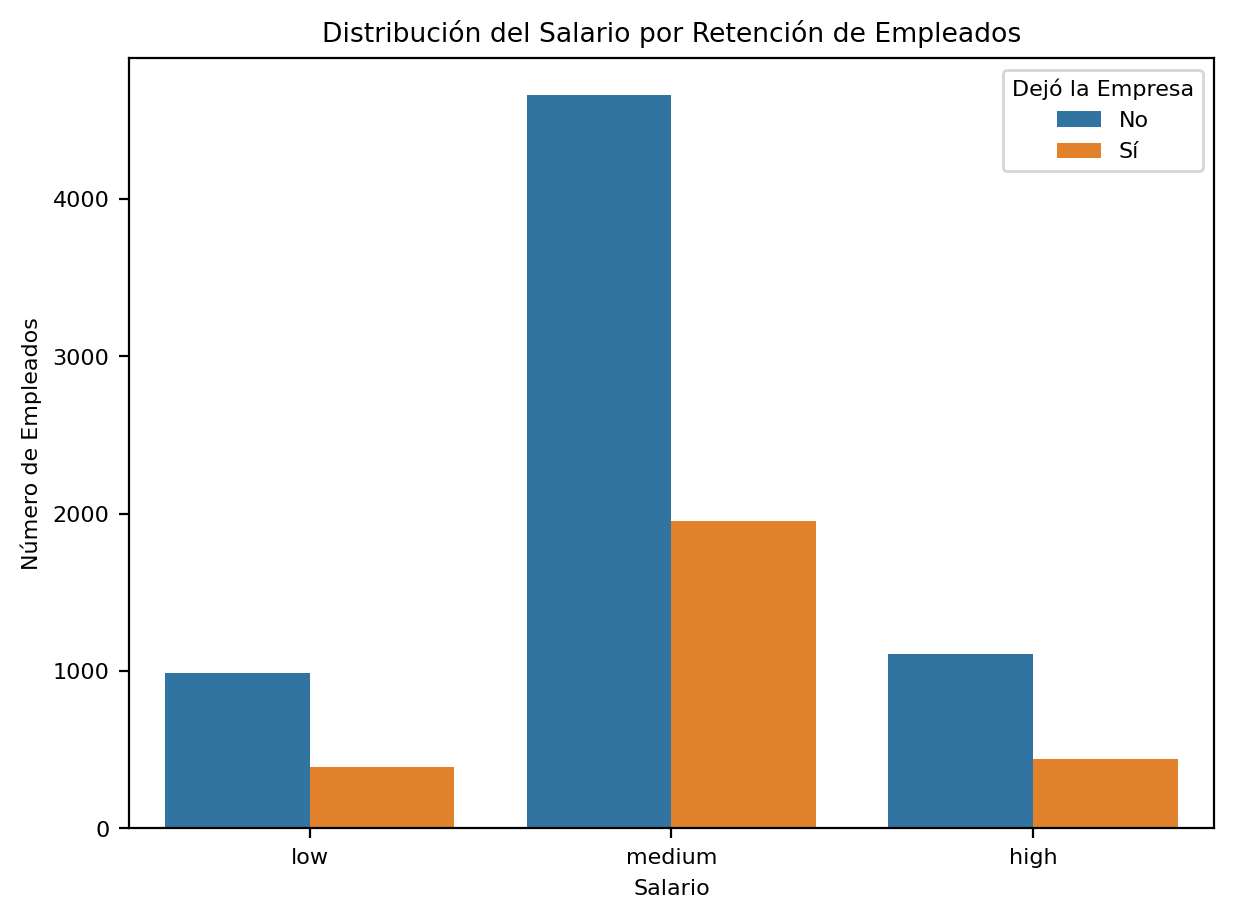

In [51]:
# Distribución de los salarios:

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='salary', hue='left', order=['low', 'medium', 'high'])

plt.title('Distribución del Salario por Retención de Empleados')
plt.xlabel('Salario')
plt.ylabel('Número de Empleados')
plt.legend(title='Dejó la Empresa', labels=['No', 'Sí'])

plt.show()


Aquí se muestra que un mayor número de empleados con salario medio han dejado la empresa en comparación con aquellos con salarios altos y bajos, sería conveniente revisareste factor enconjunto con otro para validar factores adicionales que estén siendo influyentes enla rotación que se presenta.

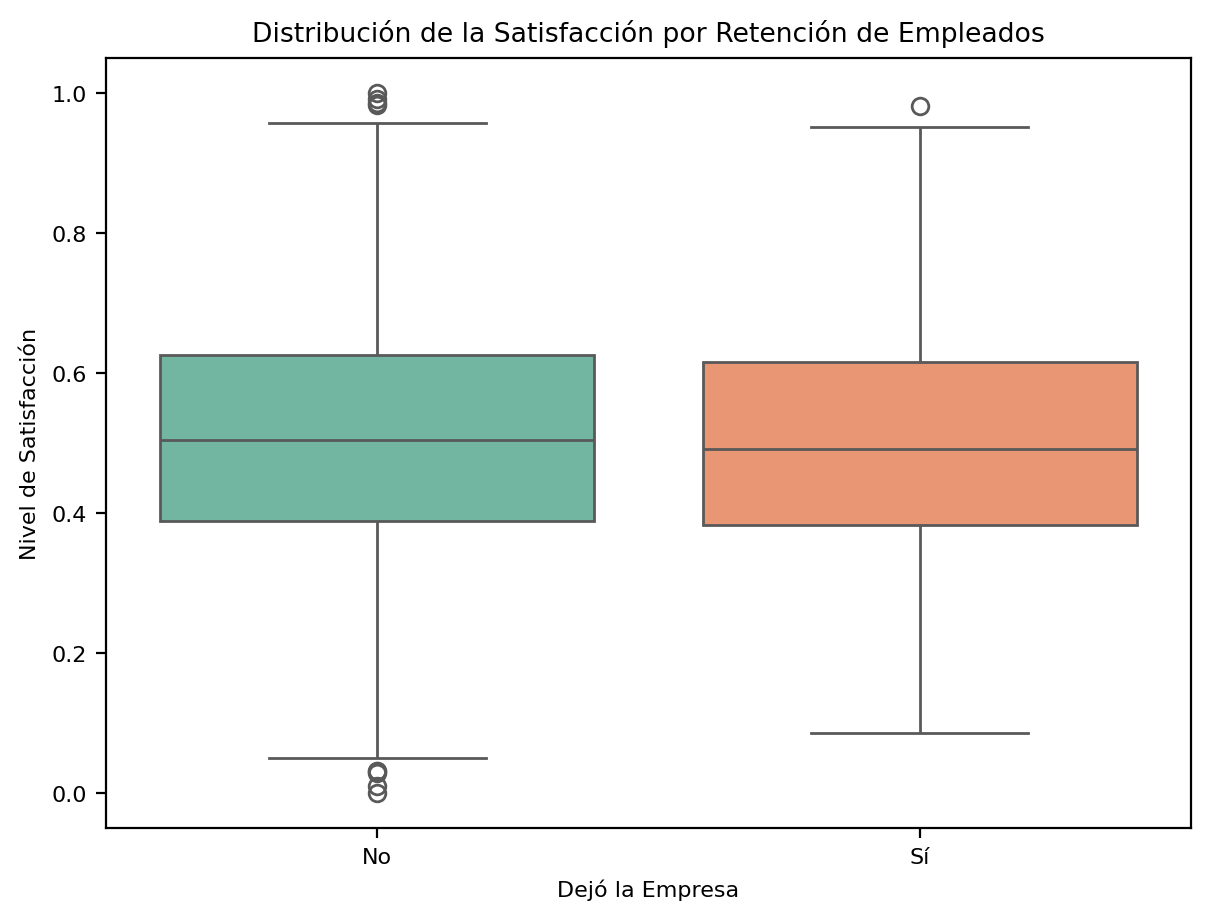

In [53]:
# Distribución de lasatisfacción:

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='left', y='satisfaction', palette='Set2')

plt.title('Distribución de la Satisfacción por Retención de Empleados')
plt.xlabel('Dejó la Empresa')
plt.ylabel('Nivel de Satisfacción')
plt.xticks([0, 1], ['No', 'Sí'])

plt.show()

Este gráfico de cajas deja ver que la mediana del nivel de satisfacción es similar enambos casos, si bien la satisfacción laboral es un factor importante en la retención de empleados, serí mejor analizar este punto con otros aspectos complementarios.

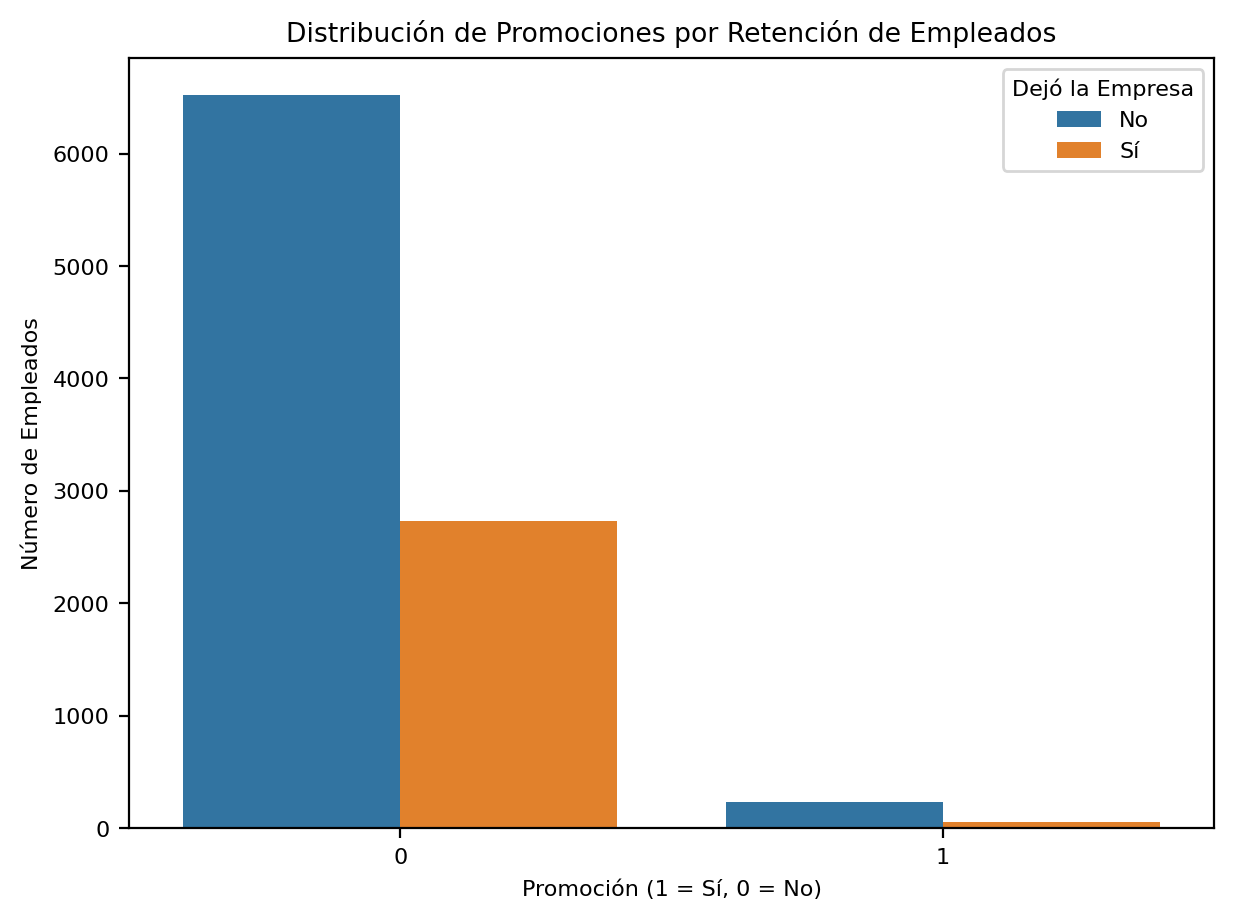

In [55]:
# Visualización de la distribución de promociones

plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='promoted', hue='left')

plt.title('Distribución de Promociones por Retención de Empleados')
plt.xlabel('Promoción (1 = Sí, 0 = No)')
plt.ylabel('Número de Empleados')
plt.legend(title='Dejó la Empresa', labels=['No', 'Sí'])

plt.show()

Mediante esta gráfica se evidencia que la mayoría de los empleados que no han sido promovidos tienden a dejar la empresa, acá esunpoco más significativa la diferencia que sugiere hacer zoom en las oportunidades de crecimiento sin embargo, en los empleados promovidos también están dejando la empresa, así que podría haber otros factores en juego.

Luegodeno teneraún un análisis muy claro, decidí revizar 2 factores más: Tiempo de servicio (Antigüedad) y promedio de horas trabajadas al mes.

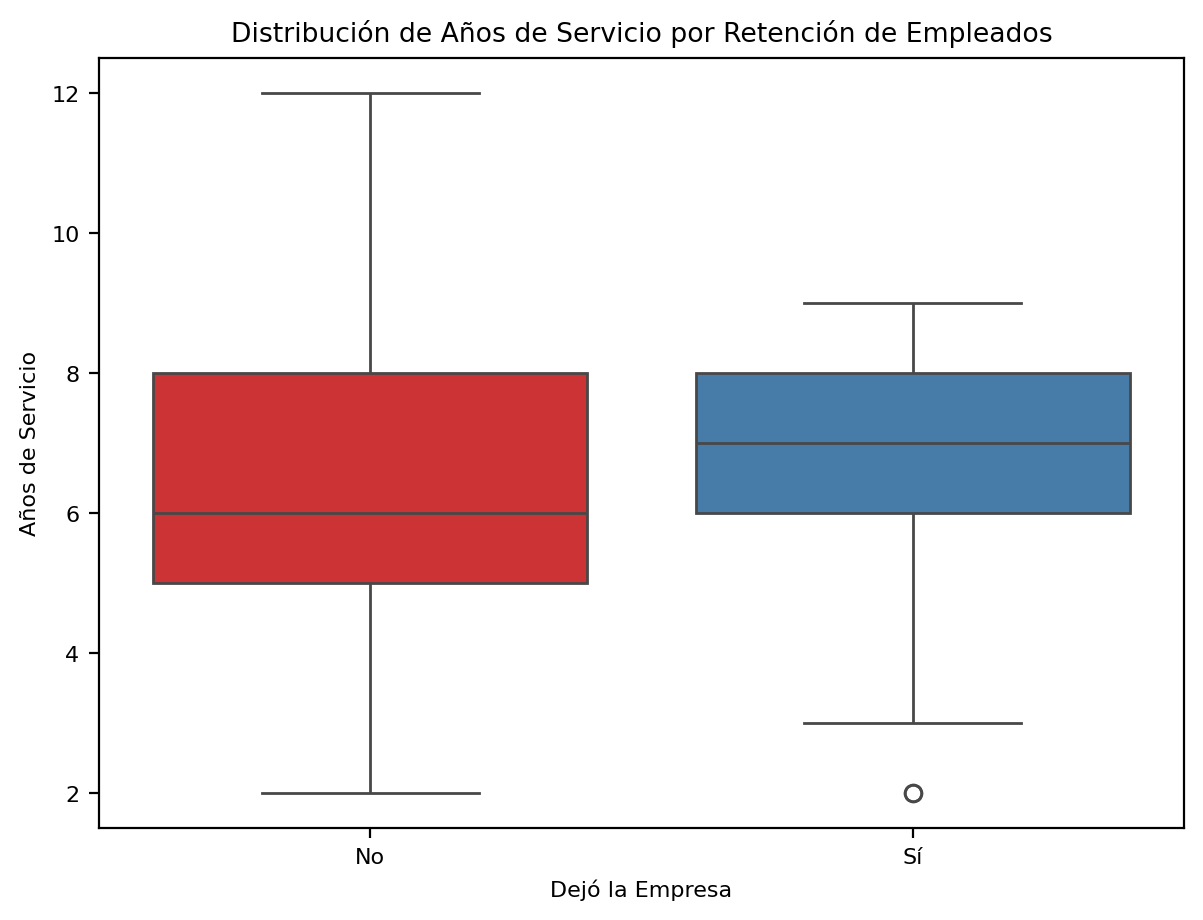

In [57]:
#Distribución de Años de Servicio

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='left', y='tenure', palette='Set1')

plt.title('Distribución de Años de Servicio por Retención de Empleados')
plt.xlabel('Dejó la Empresa')
plt.ylabel('Años de Servicio')
plt.xticks([0, 1], ['No', 'Sí'])

plt.show()

De acuerdo a lo que se observa aquí, los empleados que dejaron la empresa, tenían entre 3  y 9 años de antigüedad frente a los que los que continúan laborando en ella, cuyo rango es mayor ya que varía entre los 2 y 12 años, realmente no es muy concluyente veresta información aislada.

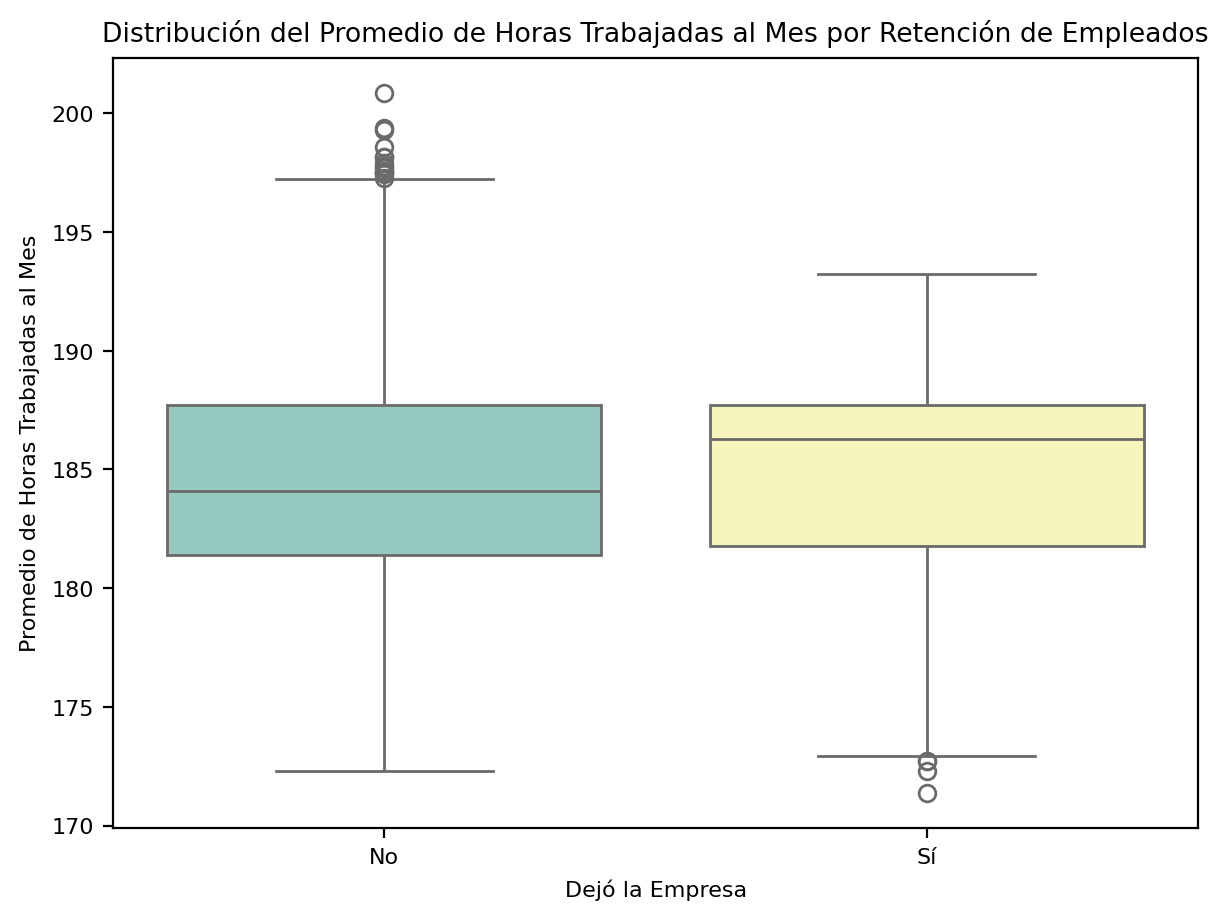

In [58]:
# Visualización del promedio de Horas Trabajadas al Mes

plt.figure(figsize=(7, 5))
sns.boxplot(data=df, x='left', y='avg_hrs_month', palette='Set3')

plt.title('Distribución del Promedio de Horas Trabajadas al Mes por Retención de Empleados')
plt.xlabel('Dejó la Empresa')
plt.ylabel('Promedio de Horas Trabajadas al Mes')
plt.xticks([0, 1], ['No', 'Sí'])

plt.show()

El promedio de horas trabajadas al mes enlos que dejaron la empresa, es al sutilmente mayor en comparación con los que permanecen, en este caso tampoco se puede mira tan influyente para la retención.

# Analisis:


A manera general, La empresa enfrenta una tasa de rotación del 25%, un porcentaje que requiere un análisis minucioso para identificar y abordar los factores que contribuyen a este fenómeno. Entre los hallazgos más relevantes, se observa que sólo el 3% de los empleados han sido promovidos y un 21% han recibido un bono, en promedio, la satisfacción de los empleados es de aproximadamente el 51% y aunque gráficamente esta satisfacción no mostró una diferencia muy marcada entre quienes dejaron la empresa y los que permanecen en ella, sería interesante considerarlo en conjunto con los otros factores. Tanto las oportunidades de crecimiento como los incentivos tienen un impacto importante en la motivación y la retención de los empleados, del mismo modo, la satisfacción puede ser un aspecto estratégico que, al mejorar, podría contribuir a la reducción de la tasa de rotación.
